In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install yfinance


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import yfinance as yf

In [5]:
# Apple stock price between 2020 to 2024
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
df.head()

C:\Users\india\AppData\Local\Temp\ipykernel_6284\2539753050.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2020-01-06,72.487877,72.526564,70.783278,71.034739,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500


In [7]:
# Creating feature like daily retures and moving averages
df['Return'] = df['Close'].pct_change()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['Volatility'] = df['Close'].rolling(window=10).std()

In [8]:
# Creating Target variable 1 if price goes up the next day or else 0
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [9]:
df.dropna(inplace=True)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

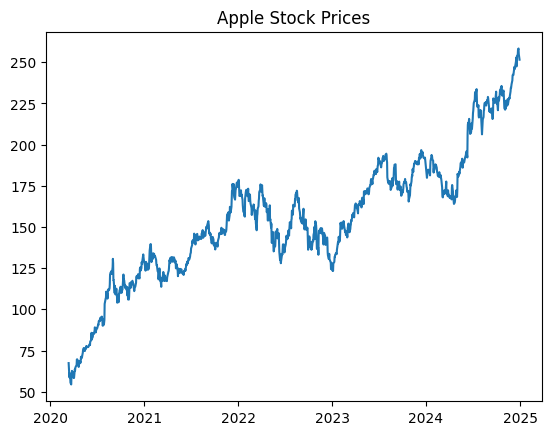

In [15]:
# Price 
plt.plot(df['Close'])
plt.title("Apple Stock Prices")
plt.show()

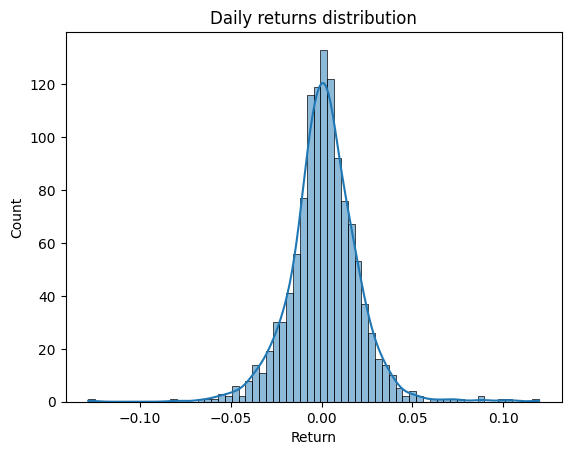

In [20]:
# Return distribution
sns.histplot(df['Return'], kde=True)
plt.title("Daily returns distribution")
plt.show()

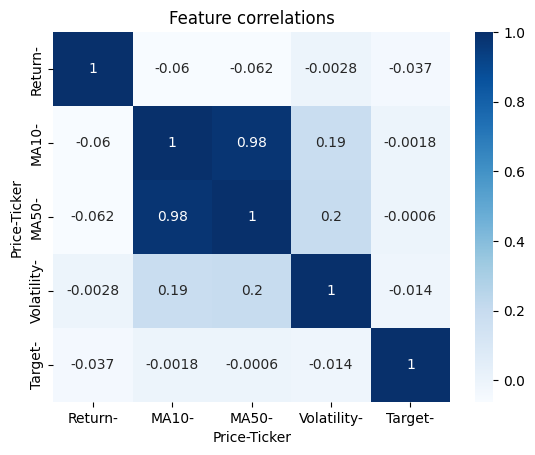

In [24]:
# Correlation Between Features
sns.heatmap(df[['Return', 'MA10', 'MA50', 'Volatility', 'Target']].corr(), annot=True, cmap='Blues')
plt.title('Feature correlations')
plt.show()

In [26]:
# Model Preparation
features = ['Return', 'MA10', 'MA50', 'Volatility']
X = df[features]
y = df['Target']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
# Training Testing Splitting
X_train, X_test, y_train, y_test = train_test_split (
    X,
    y,
    test_size = 0.2,
    random_state = 45
)

In [41]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=45)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [42]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classifications:", classification_report(y_test, y_pred))

Accuracy: 0.4834710743801653
Classifications:               precision    recall  f1-score   support

           0       0.43      0.45      0.44       109
           1       0.53      0.51      0.52       133

    accuracy                           0.48       242
   macro avg       0.48      0.48      0.48       242
weighted avg       0.49      0.48      0.48       242



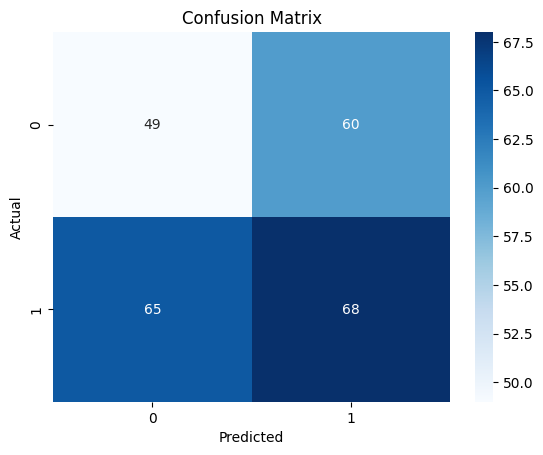

In [46]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

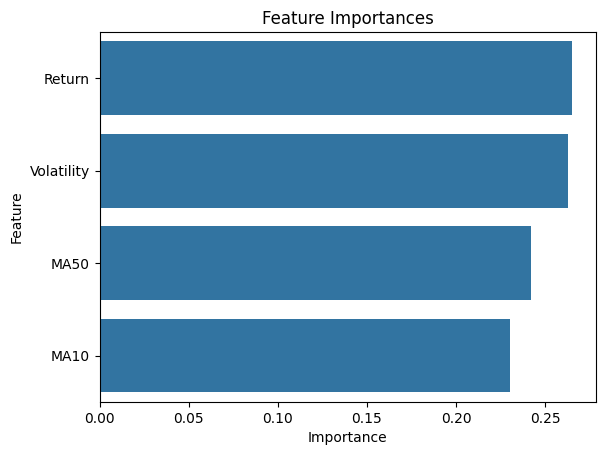

In [47]:
# Plot feature importances
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances')
plt.show()